In [1]:
import pandas as pd
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
import numpy as np
%matplotlib inline

In [2]:
medical_data = pd.read_csv("medical-charges.csv")
medical_data.head()

age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520

In [3]:
medical_data.describe()

age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010

In [4]:
medical_data.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [5]:
medical_data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [6]:
sns.set_style('whitegrid')
matplotlib.rcParams['font.size']=14
matplotlib.rcParams['figure.figsize']=(10,6)
matplotlib.rcParams['figure.facecolor']='#00000000'

In [7]:
fig = px.histogram(medical_data,
                  x = 'age',
                  nbins= 47,
                  marginal='violin',
                  title = 'age distribution of patients')
fig.update_layout(bargap=0.1)
fig.show()

In [8]:
fig = px.histogram(medical_data,
                  x = 'bmi',
                  color_discrete_sequence= ['green'],
                  marginal = 'box',
                  title= 'Distribution of BMI(Body Mass Index)')
fig.update_layout(bargap=0.1)
fig.show()

In [9]:
fig = px.histogram(medical_data,
                  x='charges',
                  color='smoker',
                  color_discrete_sequence=['blue','red'],
                  marginal = 'box',
                  title='Annual medical charges')
fig.update_layout(bargap=0.1)
fig.show()

In [10]:
fig= px.histogram(medical_data,
             x='charges',
             color = 'sex',
             color_discrete_sequence=['yellow','blue'],
             title='Distribution of charges by sex',
             marginal='box')
fig.update_layout(bargap=0.1)
fig.show()

# relationships visualization

In [11]:
fig = px.scatter(medical_data,
                x='age',
                y='charges',
                color='smoker',
                opacity=0.8,
                hover_data=['sex'],
                title= 'Age vs Charges')
fig.update_traces(marker_size= 5)
fig.show()

In [12]:
fig = px.scatter(medical_data,
                x='bmi',
                y= 'charges',
                hover_data=['children','age','region'],
                color = 'smoker',
                opacity=0.7,
                title = 'Body Mass Index vs Charges')
fig.update_traces(marker_size=5)
fig.show()

In [13]:
fig = px.box(medical_data,
            x='children',
            y='charges',
            color='smoker',
            hover_data=['bmi','region','sex'])
fig.show()

In [14]:
data_correlation = medical_data[medical_data['smoker']=='yes'].corr()

<AxesSubplot:>

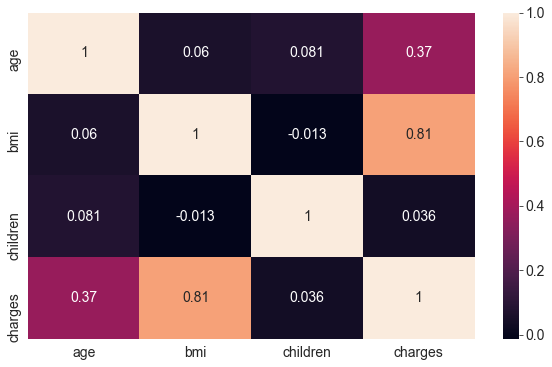

In [15]:
sns.heatmap(data_correlation, annot=True)

<AxesSubplot:>

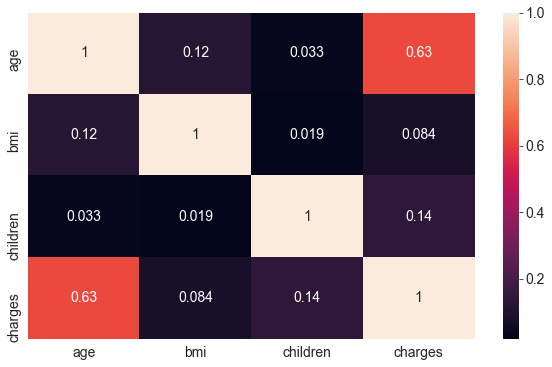

In [16]:
data_correlation = medical_data[medical_data['smoker']=='no'].corr()
sns.heatmap(data_correlation, annot=True)

In [17]:
smoker_values = {'no':0,'yes':1}
numeric_smoker = medical_data['smoker'].map(smoker_values)
medical_data['smoker_numeric'] = numeric_smoker
medical_data.head()

age     sex     bmi  children smoker     region      charges  \
0   19  female  27.900         0    yes  southwest  16884.92400   
1   18    male  33.770         1     no  southeast   1725.55230   
2   28    male  33.000         3     no  southeast   4449.46200   
3   33    male  22.705         0     no  northwest  21984.47061   
4   32    male  28.880         0     no  northwest   3866.85520   

   smoker_numeric  
0               1  
1               0  
2               0  
3               0  
4               0

## Regression Analysis

In [18]:
nonsmoker_data = medical_data[medical_data['smoker']=='no']

In [19]:
fig = px.scatter(nonsmoker_data,
                x='age',
                y='charges',
                color='children',
                hover_data=['bmi'],
                title = 'Non-smoker Patient Age vs Charges')
fig.update_traces(marker_size = 5)
fig.show()

In [20]:
model = LinearRegression()
x = nonsmoker_data[['age']]
y = nonsmoker_data['charges']

Root Mean Square Error:  5503.748588266937


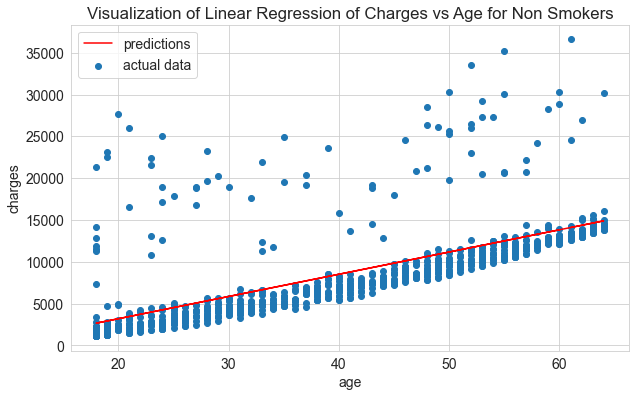

In [21]:
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size= 0.2)
model.fit(x_train,y_train)
predictions = model.predict(x_test)
rmse = np.sqrt(np.mean(np.square(y_test-predictions)))
print("Root Mean Square Error: ", rmse)
plt.scatter(x_train,y_train, label = 'actual data')
plt.plot(x_test,predictions, 'r', label = 'predictions')
plt.xlabel('age')
plt.ylabel('charges')
plt.title('Visualization of Linear Regression of Charges vs Age for Non Smokers')
plt.legend()
plt.show()

Root Mean Square Error:  5035.753177669761


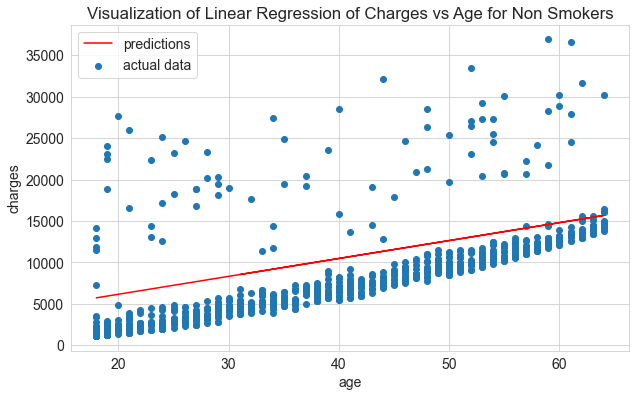

In [22]:
mod = SGDRegressor()
x_train,x_test, y_train,y_test = train_test_split(x,y,test_size= 0.2)
mod.fit(x_train,y_train)
predictions = mod.predict(x_test)
rmse = np.sqrt(np.mean(np.square(y_test-predictions)))
print("Root Mean Square Error: ", rmse)
plt.scatter(x_train,y_train, label = 'actual data')
plt.plot(x_test,predictions, 'r', label = 'predictions')
plt.xlabel('age')
plt.ylabel('charges')
plt.title('Visualization of Linear Regression of Charges vs Age for Non Smokers')
plt.legend()
plt.show()

In [23]:
def test_size_optimizer(k):
    x_train,x_test, y_train,y_test = train_test_split(x,y,test_size= k)
    model.fit(x_train,y_train)
    predictions = model.predict(x_test)
    rmse_test = np.sqrt(np.mean(np.square(y_test-predictions)))
    print("Root Mean Square Error: ", rmse_test)
    plt.scatter(x_train,y_train, label = 'actual data')
    plt.plot(x_test,predictions, 'r', label = 'predictions')
    plt.xlabel('age')
    plt.ylabel('charges')
    plt.title("Visualization of Linear Regression of Charges vs Age")
    plt.legend()
    plt.show()
    return rmse_test
    

Root Mean Square Error:  4327.015401044793


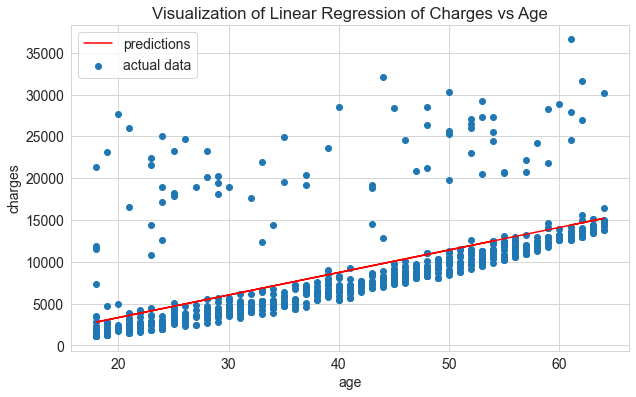

4327.015401044793

In [24]:
test_size_optimizer(0.30)

In [25]:
def test_size_performance_evaluation(num_list):
    rmse_score_list =[]
    for i in num_list:
        test_size_optimizer(i)
        rmse_score_list.append(test_size_optimizer(i))
    plt.plot(num_list,rmse_score_list)
    plt.xlabel("test size")
    plt.ylabel("Root Mean Squared Error")
    plt.show()
    return rmse_score_list

Root Mean Square Error:  4497.012800483532


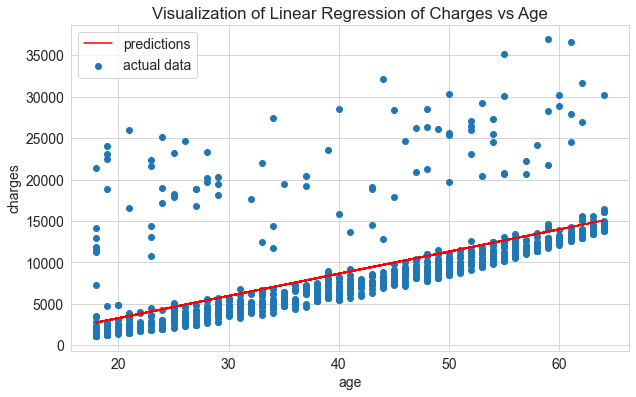

Root Mean Square Error:  4492.384074477791


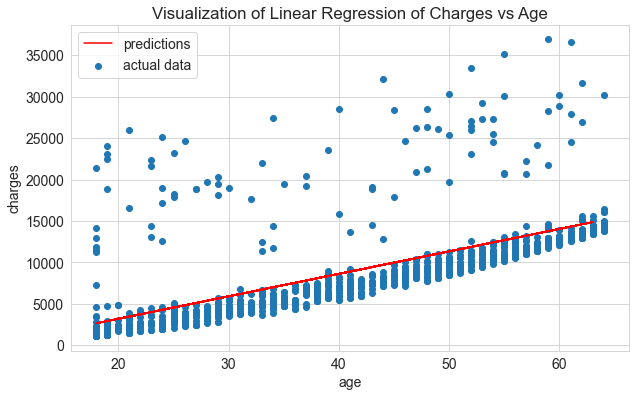

Root Mean Square Error:  4150.87479661228


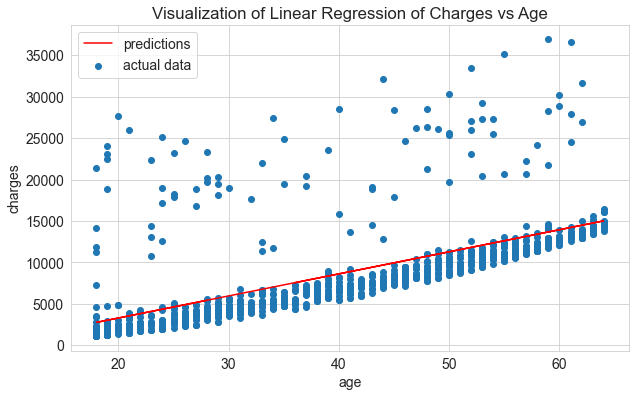

Root Mean Square Error:  4245.146519137139


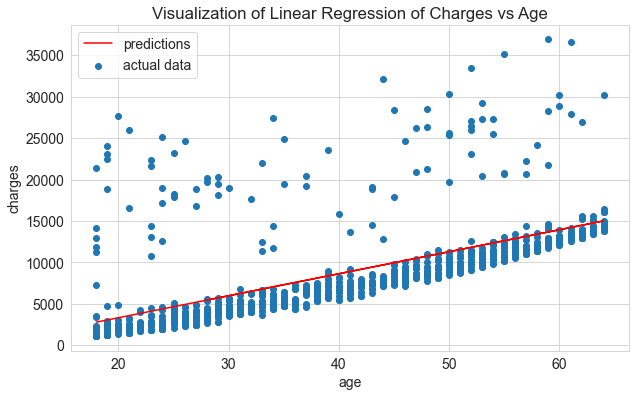

Root Mean Square Error:  5483.010768266561


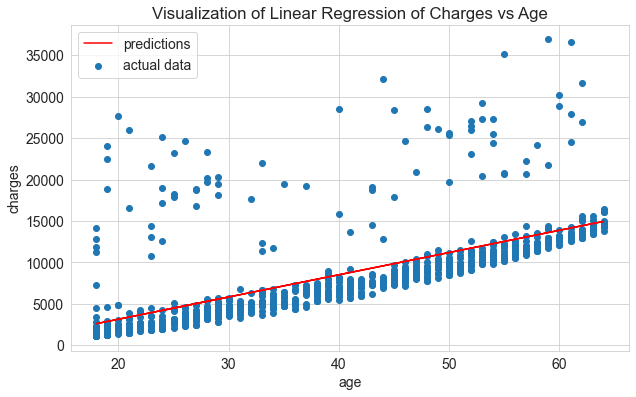

Root Mean Square Error:  4386.979291653572


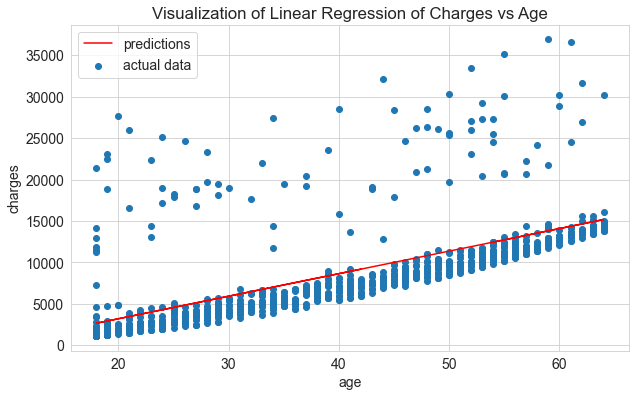

Root Mean Square Error:  5101.213946995263


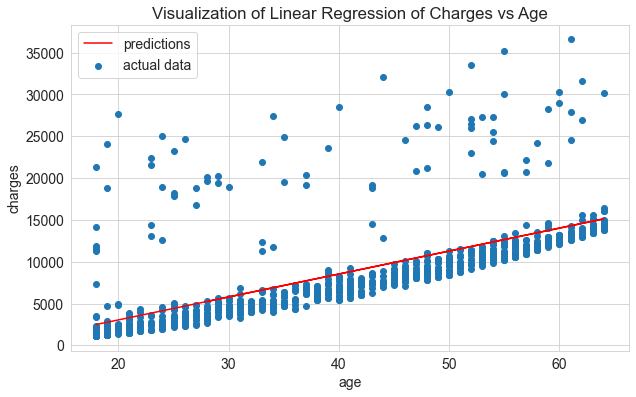

Root Mean Square Error:  4511.950250662992


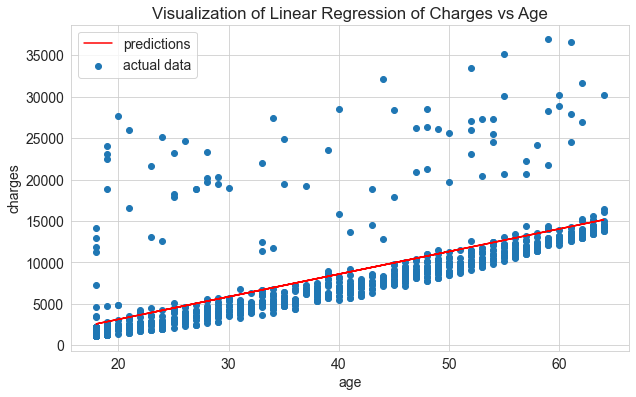

Root Mean Square Error:  4037.603595838513


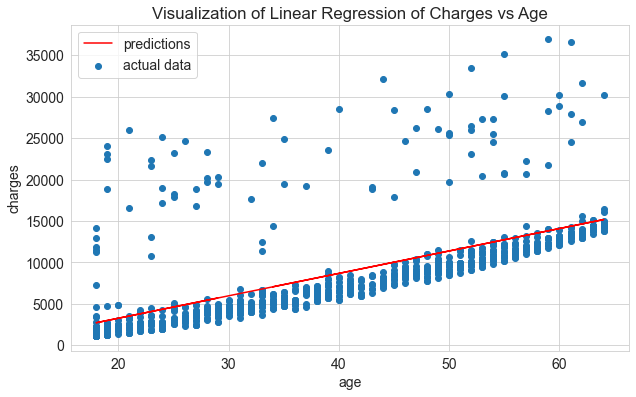

Root Mean Square Error:  4742.6317209458675


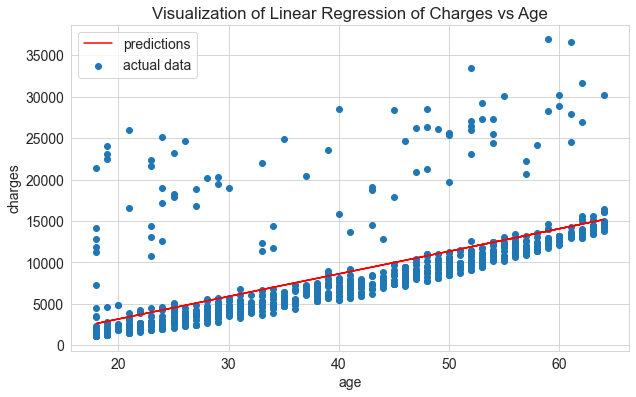

Root Mean Square Error:  4767.876393354316


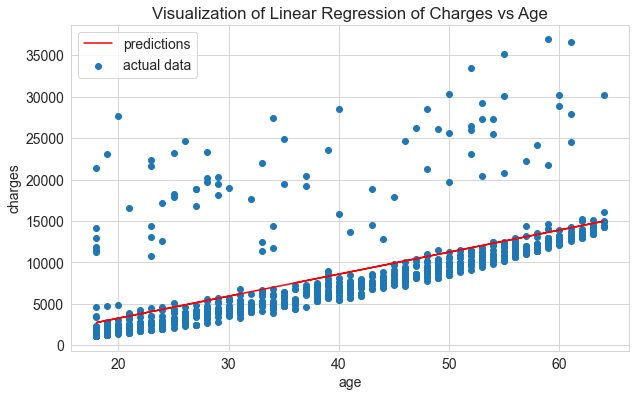

Root Mean Square Error:  4482.911834608674


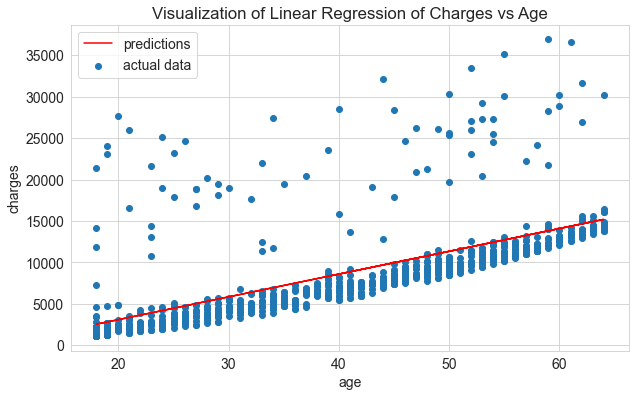

Root Mean Square Error:  4912.648881859128


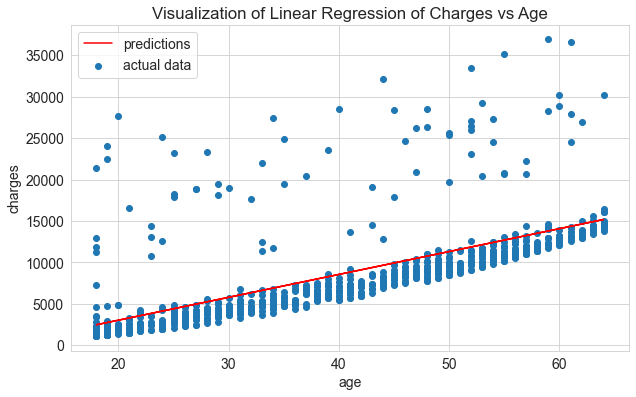

Root Mean Square Error:  4196.191455199481


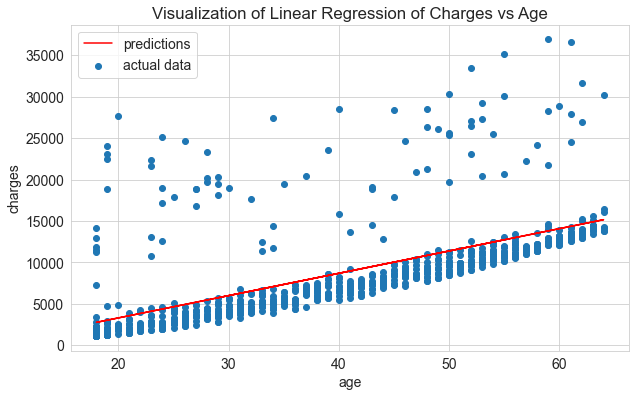

Root Mean Square Error:  4394.239279121558


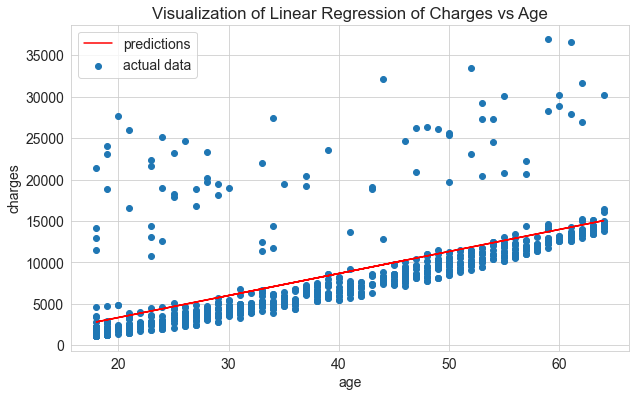

Root Mean Square Error:  4318.257396903068


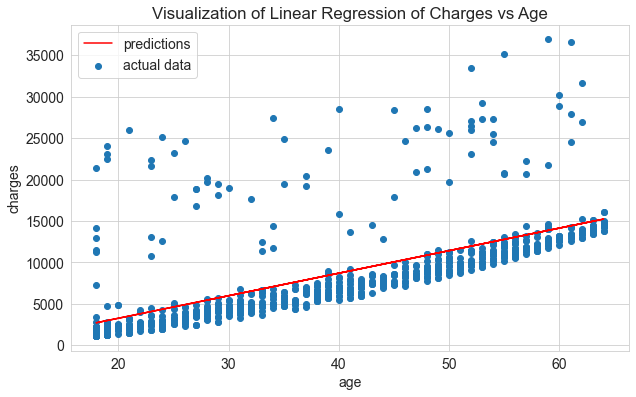

Root Mean Square Error:  4578.599309040329


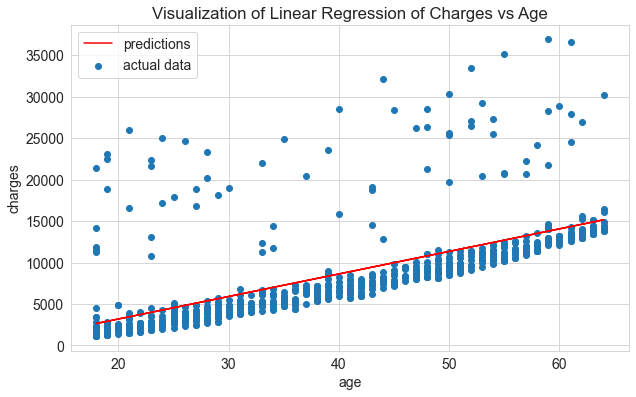

Root Mean Square Error:  4789.744709267153


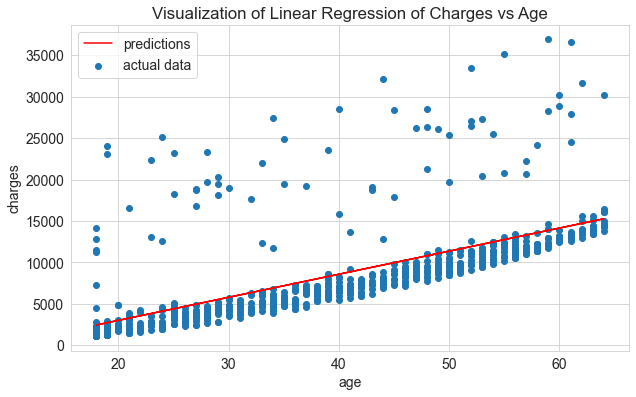

Root Mean Square Error:  4742.113004847994


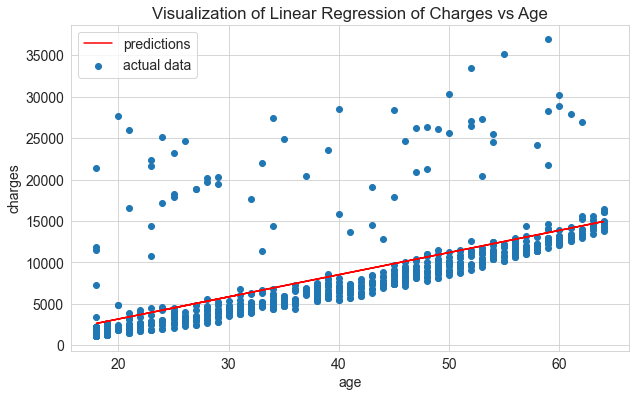

Root Mean Square Error:  4397.419012316488


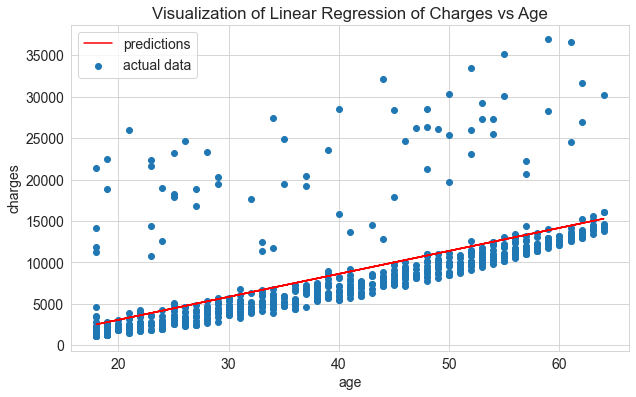

Root Mean Square Error:  4538.544976828075


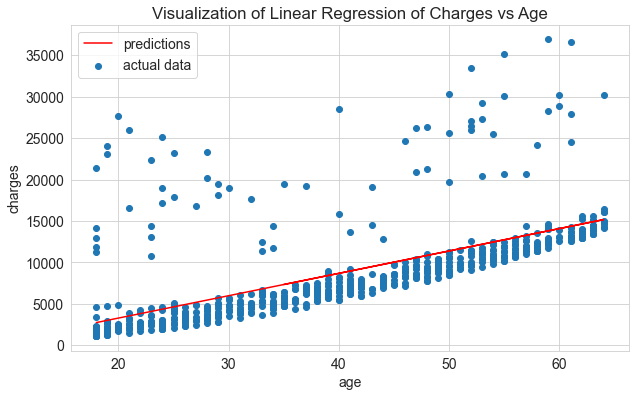

Root Mean Square Error:  5022.667690871436


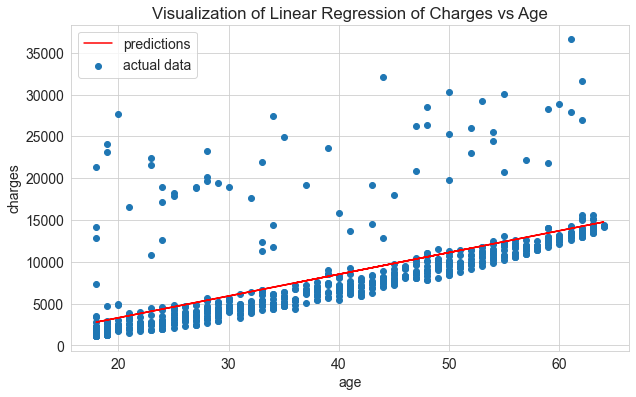

Root Mean Square Error:  4514.708426753957


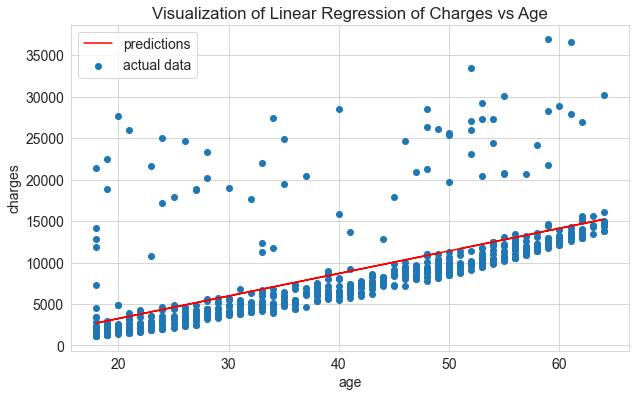

Root Mean Square Error:  4966.598640584417


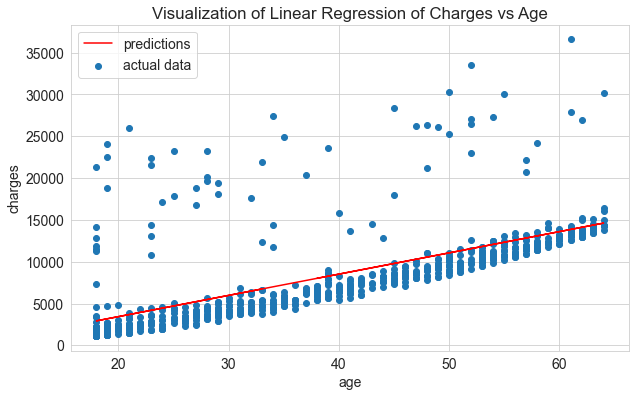

Root Mean Square Error:  4439.01379415341


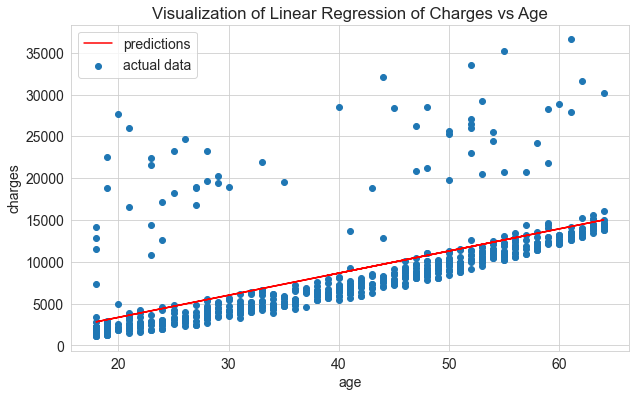

Root Mean Square Error:  4332.441077840515


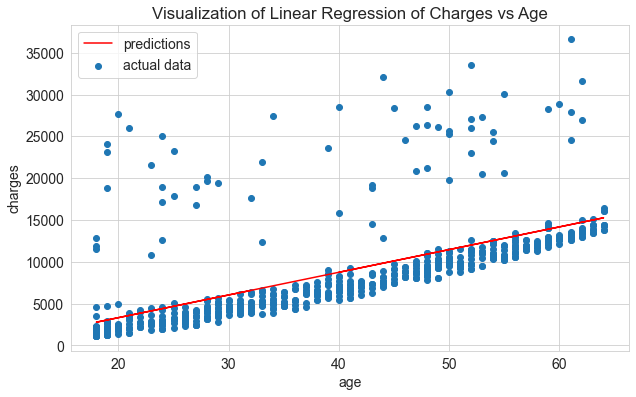

Root Mean Square Error:  4784.255605672763


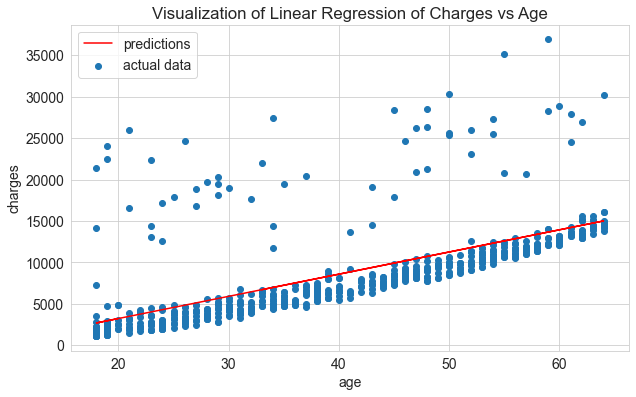

Root Mean Square Error:  4695.755410282717


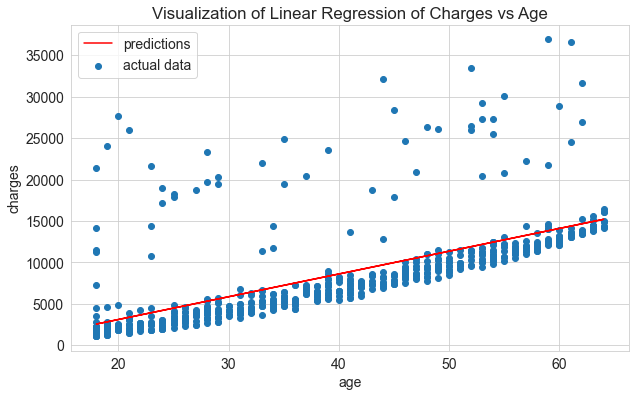

Root Mean Square Error:  5171.288096226389


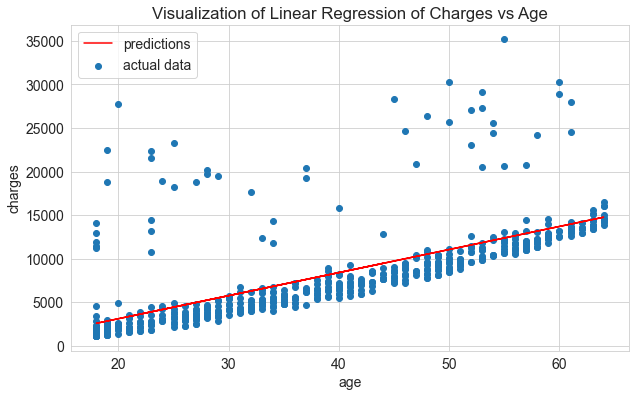

Root Mean Square Error:  4634.402258124454


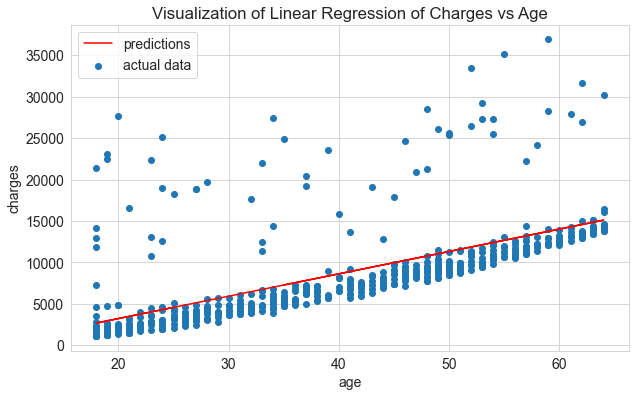

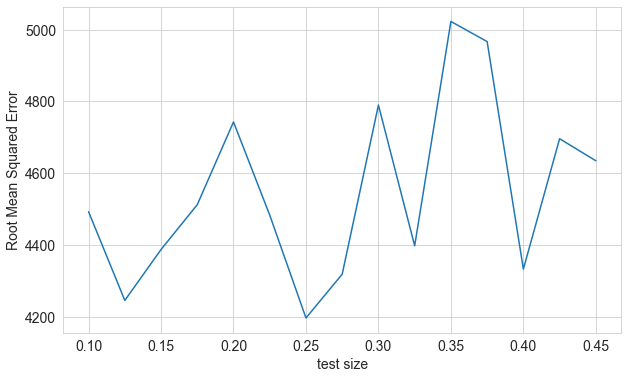

[4492.384074477791,
 4245.146519137139,
 4386.979291653572,
 4511.950250662992,
 4742.6317209458675,
 4482.911834608674,
 4196.191455199481,
 4318.257396903068,
 4789.744709267153,
 4397.419012316488,
 5022.667690871436,
 4966.598640584417,
 4332.441077840515,
 4695.755410282717,
 4634.402258124454]

In [26]:
eval_list = [0.10,0.125,0.15,0.175,0.20,0.225,0.25,0.275,0.30,0.325,0.35,0.375,0.40,0.425,0.45]
test_size_performance_evaluation(eval_list)

Text(0.5, 1.0, 'Charges vs BMI of smokers')

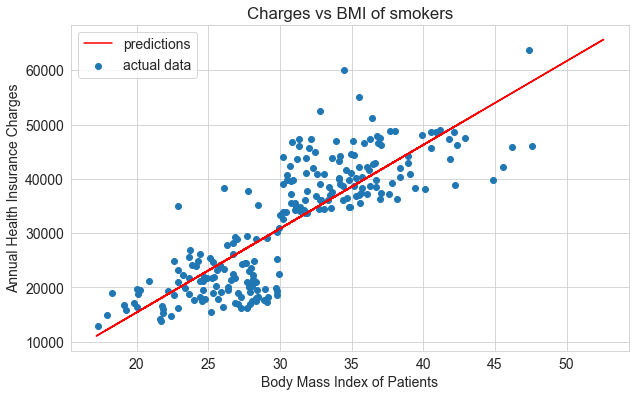

In [34]:
smoker_data = medical_data[medical_data['smoker']=='yes']
X = smoker_data[['bmi']]
y = smoker_data['charges']
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.15)
model = LinearRegression()
model.fit(x_train,y_train)
predicted = model.predict(x_test)
plt.scatter(x_train,y_train,label='actual data')
plt.plot(x_test,predicted,'r',label='predictions')
plt.xlabel("Body Mass Index of Patients")
plt.ylabel("Annual Health Insurance Charges")
plt.legend()
plt.title("Charges vs BMI of smokers")

In [38]:
def rmse(test,predictor):
    return np.sqrt(np.mean(np.square(test-predictor)))

print("Root mean squared error:",rmse(y_test,predicted))


Root mean squared error: 9070.186774127007


# Multi-Linear Regression

In [29]:
inputs, targets = nonsmoker_data[['age', 'bmi']], nonsmoker_data['charges']
multilinear = LinearRegression().fit(inputs,targets)
predictions = multilinear.predict(inputs)
loss = np.sqrt(np.mean(np.square(targets-predictions)))
print(loss)

4662.312835461298


In [32]:
inputs, targets = smoker_data[['age', 'bmi']], smoker_data['charges']
multilinear = LinearRegression().fit(inputs,targets)
predictions = multilinear.predict(inputs)
loss = np.sqrt(np.mean(np.square(targets-predictions)))
print(loss)

5722.782238884456
